# Crash Insights: Analyzing Car Accidents and Predicting Accident Severity in the US
### Team 11: Deepanshu Jain, Sujith Kamme, Derek Lim and Timothy Sujo

## Project Idea
Car accidents continue to be a major issue in the modern urban transportation landscape, with repercussions for both the public's safety and the condition of the roads. To develop effective preventative measures and raise the bar for road safety, it is essential to analyze the variables that cause accidents and comprehend their severity. By utilizing a large dataset, this project intends to investigate the specifics of car accidents, casting light on trends, significant factors, and using a predictive model for accident severity.

## Dataset Description {Corrections need to be made in this as well as data only till Dec 21}
The US Accidents Dataset (2016-2023) is a countrywide car accident dataset that covers 49 states in the USA, from February 2016-March 2023. It can be downloaded from here.
This dataset is being distributed for non-commercial use only under CC BY 4.0. The dataset is collected using multiple APIs that provide streaming traffic incident or event data. The data contains the date, the start and end times of each accident, the surrounding weather conditions, the location of the accident, the street characteristics near the accident, and a general accident description. It also includes a column showing the impact of each accident on traffic, providing a label for accident severity. With the large size of the dataset, this makes it perfect for analysis and predicting the severity of accidents caused in the United States from 2016 to 2023.

<b>License</b>: Creative Commons Attribution-Noncommercial-ShareAlike (CC BY-NC-SA 4.0)

<b>Size</b> - 3.06 GB (7.7 Million Records)

---

Using Python Version - 3.10.5

We Are using a previous version of the dataset that is updated till December 2021 due to large data processing and handling issues.

Size - 1.1 GB (2.8 Million Records)

March23 version has too much data to process so we would face some problems in getting the project done.

---

We have to do this for the progress report:

1. Data Preprocessing : This step includes cleaning the data by checking for any missing values, spelling errors, typos and handling them. We will check for any outliers and remove them. We will check for biased data. Also, we will encode categorical variables.

2. Data Transformation : In this stage, we will identify features and target variables based on the questions we come up with. We will look at the data to find hidden insights and perform feature engineering. We will also normalize the data for better efficiency of our model.

3. Exploratory Data Analysis and Visualization: This entails analyzing the data and creating data-driven insights. We will identify general patterns in the data. We will work closely with Severity Analysis, Location analysis, Time Analysis, Road Condition Analysis, Weather Analysis and all other Insights.

## Importing Neccessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import chart_studio.plotly as py
import plotly as pt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
# Now set up everything so that the figures show up in the notebook:
init_notebook_mode(connected=True)

## Read in the Data

In [ ]:
data = pd.read_csv("US_Accidents_Dec21_updated.csv")

## Data Exploration (7 Steps)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
data.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


### Variable Identification

### Univariate Analysis

### Bivariate Analysis

### Missing Values Treatment

In [ ]:
data.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

<Axes: >

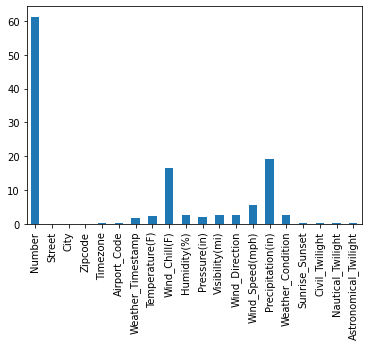

In [ ]:
#finding the percentage of missing values in each column
percentage_of_missing_values=data.isna().sum()/len(data)*100
percentage_of_missing_values[percentage_of_missing_values!=0].plot(kind="bar")

In [ ]:
# As we can see in 'Number' column there is more 60% of the missing values. So Instead of filling the missing values it is better to remove this column.
data.drop(["Number"],axis=1,inplace=True)

In [ ]:
#There is around 20% missing values in the 'Precipitation(in)' and in 'Wind_Chill(F)' columns. So we need to adjust those values.

In [ ]:
#Also there are some columns which are of no use, like the columns 'Country','Timezone' we know we are doing analysis on only one country US. It is better to remove those columns:

data.drop(["Country"],axis=1,inplace=True)
data.drop(["Timezone"],axis=1,inplace=True)

In [ ]:
data.isna().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Street                        2
Side                          0
City                        137
County                        0
State                         0
Zipcode                    1319
Airport_Code               9549
Weather_Timestamp         50736
Temperature(F)            69274
Wind_Chill(F)            469643
Humidity(%)               73092
Pressure(in)              59200
Visibility(mi)            70546
Wind_Direction            73775
Wind_Speed(mph)          157944
Precipitation(in)        549458
Weather_Condition         70636
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction

### Outlier Treatment

### Variable Transformation

### Variable Creation

## Exploratory Data Analysis and Visualization

-------
for progress report

## PCA
Due to so many columns.